In [ ]:
install.packages("rstan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘Rcpp’, ‘RcppParallel’, ‘loo’, ‘RcppEigen’, ‘BH’




In [8]:
library(rstan)

rstan_options(auto_write=TRUE)
options(mc.cores=parallel::detectCores()-1)
# options(mc.cores=3)

#.................................................................

programa <- "
data{
  int<lower=1> n;
  int<lower=0,upper=1> sexo[n];
  real<lower=0> edad[n];
  real<lower=0> bp[n];
}

parameters{
  real beta_0;
  real beta_sexo;
  real beta_edad;
  real<lower=0> sigma2;
}

transformed parameters {
  real<lower=0> sigma;
  sigma = sqrt(sigma2);
}

model{
for (i in 1:n) {
  bp[i] ~ normal(beta_0 + beta_sexo*sexo[i] + beta_edad*edad[i], sigma);
}

beta_0 ~     normal(0.0, 1.0E3);
beta_sexo ~  normal(0.0, 1.0E3);
beta_edad ~  normal(0.0, 1.0E3);
sigma2 ~     inv_gamma(1.0E-3, 1.0E-3);
}
"

#.................................................................
 
# Introduzco los datos
sexo = c(0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,
0,1,1,1,1)

edad = c(59,52,37,40,67,43,61,34,51,58,54,31,49,45,66,48,41,
47,53,62,60,33,44,70,56,69,35,36,68,38)

bp = c(143,132,88,98,177,102,154,83,131,150,131,69,111,114,
170,117,96,116,131,158,156,75,111,184,141,182,74,87,183,89)

n = length(sexo)
datos = list(sexo=sexo, edad=edad, bp=bp, n=n)

iteras = 1000
sale = stan(model_code=programa, data=datos, iter=iteras, chains=3)
sale




SAMPLING FOR MODEL '272b86466574e6653ac8b94d19991a8b' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.202857 seconds (Warm-up)
Chain 1:                0.076266 seconds (Sampling)
Chain 1:   

Inference for Stan model: 272b86466574e6653ac8b94d19991a8b.
3 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1500.

            mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
beta_0    -23.49    0.13 3.54 -30.76 -25.86 -23.34 -21.15 -16.50   726 1.00
beta_sexo   1.69    0.05 1.49  -1.32   0.70   1.71   2.65   4.69   883 1.01
beta_edad   2.94    0.00 0.06   2.82   2.90   2.94   2.99   3.08   747 1.00
sigma2     16.42    0.19 4.75   9.76  13.11  15.62  18.69  27.98   638 1.00
sigma       4.01    0.02 0.56   3.12   3.62   3.95   4.32   5.29   656 1.00
lp__      -56.27    0.06 1.52 -60.13 -57.02 -55.90 -55.13 -54.42   618 1.00

Samples were drawn using NUTS(diag_e) at Sun Jul 10 15:16:02 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

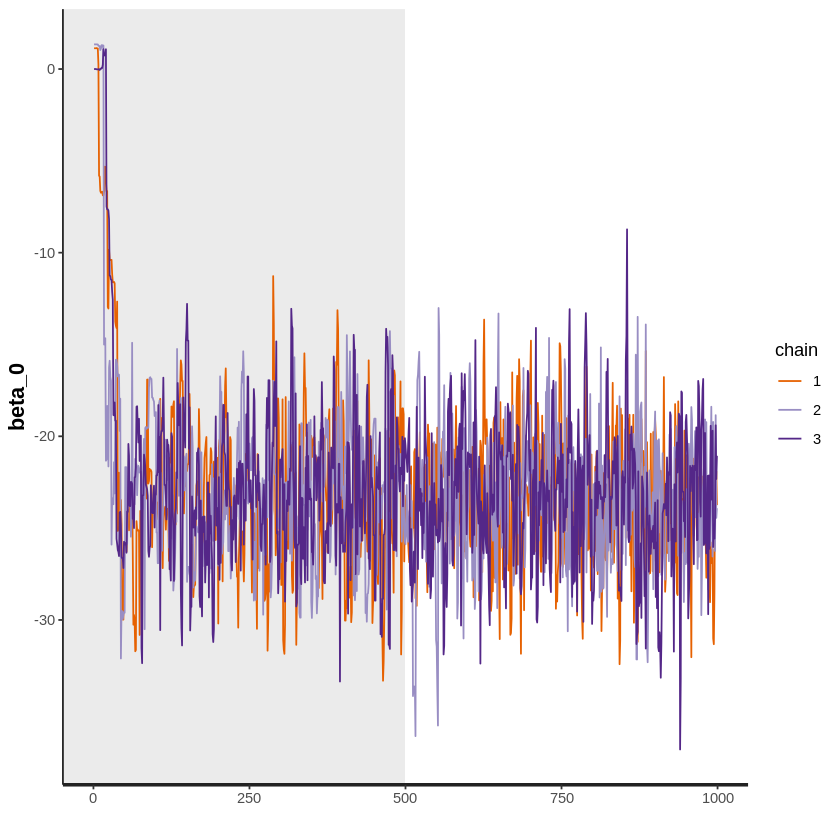

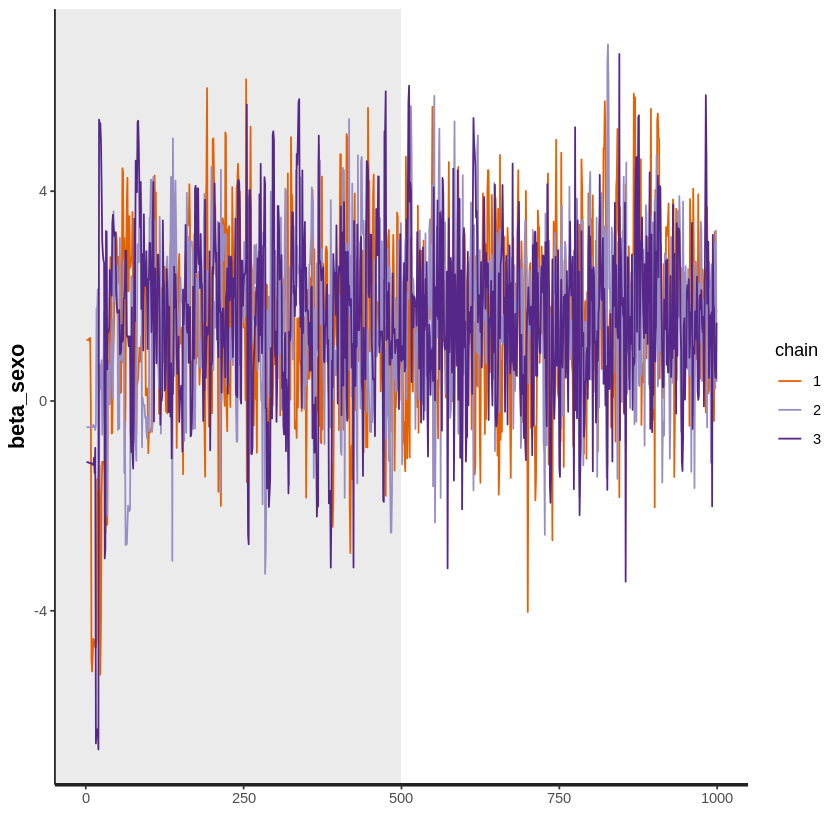

ci_level: 0.95 (95% intervals)

outer_level: 0.95 (95% intervals)



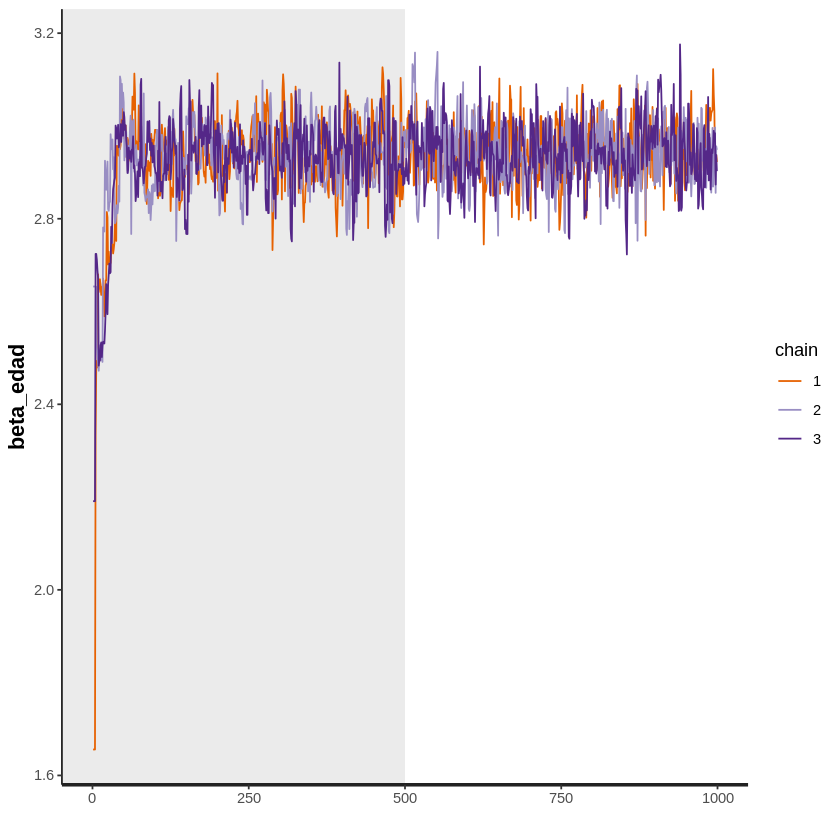

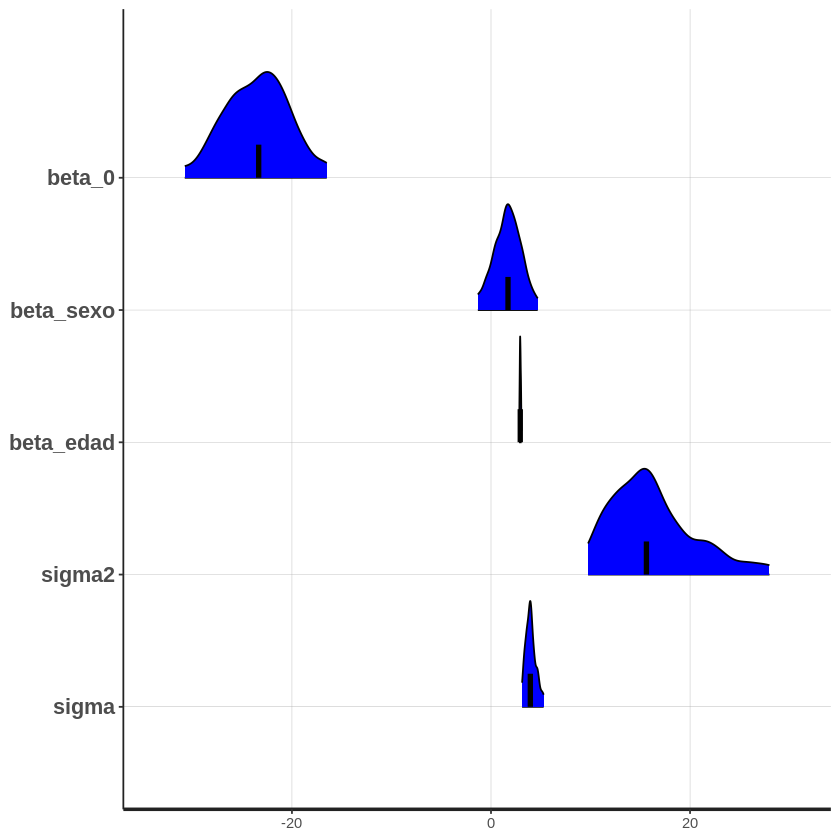

In [9]:

# traceplot(sale, pars=c("beta_0", "beta_sexo", "beta_edad"), inc_warmup=TRUE)

traceplot(sale, pars="beta_0", inc_warmup=TRUE)
traceplot(sale, pars="beta_sexo", inc_warmup=TRUE)
traceplot(sale, pars="beta_edad", inc_warmup=TRUE)

plot(sale, show_density=TRUE, ci_level=0.95, fill_color="blue")

